## Repo Analysis

In [1]:
from utils.git_utils import clone_repo
from pathlib import Path
from analyzers.code_analyzer import CodeAnalyzer, NodeKind, is_kind, EdgeType
url = 'https://github.com/adiprerepa/cs598APE-hw1'
branch = 'pesquared-starting'
# repo = clone_repo(url, branch=branch)
# working_dir = repo.working_dir
# print(f"Working directory: {working_dir}")
# PROJECT_DIR = Path(working_dir).resolve()

analyzer = CodeAnalyzer(url, branch)
PROJECT_DIR = analyzer.repo_path

✅ libclang loaded from: /usr/lib/llvm-18/lib/libclang.so
✅ Uber file generated at /home/ayuram/pesquared/tmp/adiprerepa/cs598APE-hw1/__uber.cpp
✅ Library subgraph loaded from /home/ayuram/pesquared/tmp/adiprerepa/cs598APE-hw1/lib_subgraph.gpickle
Found 8127 nodes
Found 8453 edges
Adding edge from Ray::Ray to Vector::Vector
Adding edge from Ray::Ray to Vector::Vector
Adding edge from Camera::Camera to Vector::Vector
Adding edge from Camera::Camera to Vector::Vector
Adding edge from Camera::Camera to Vector::Vector
Adding edge from Camera::Camera to Vector::Vector
Adding edge from Light::Light to Vector::Vector
Adding edge from LightNode::LightNode to Light::Light
Adding edge from LightNode::LightNode to LightNode::LightNode
Adding edge from LightNode::LightNode to LightNode::LightNode
Adding edge from Shape::Shape to Vector::Vector
Adding edge from Shape::Shape to AABB::AABB
Adding edge from Shape::Shape to Texture::Texture
Adding edge from Shape::Shape to Texture::Texture
Adding edge f

⚠️ Graph is not a DAG. Using SCC condensation for level estimation.
⚠️ Found cycles: [['Box::getIntersection(Ray)', 'Disk::getIntersection(Ray)'], ['Box::getIntersection(Ray)', 'Disk::getIntersection(Ray)', 'Triangle::getIntersection(Ray)'], ['Box::getIntersection(Ray)', 'Triangle::getIntersection(Ray)'], ['Box::getIntersection(Ray)', 'Triangle::getIntersection(Ray)', 'Disk::getIntersection(Ray)'], ['Disk::getIntersection(Ray)', 'Triangle::getIntersection(Ray)'], ['BVHNode::BVHNode', 'BVHNode::left'], ['BVHNode::BVHNode', 'BVHNode::right'], ['Sphere::getColor(unsigned char *, double *, double *, double *, Autonoma *, Ray, unsigned int)', 'Plane::getColor(unsigned char *, double *, double *, double *, Autonoma *, Ray, unsigned int)'], ['Autonoma::listEnd', 'ShapeNode::ShapeNode', 'ShapeNode::data', 'Shape::Shape', 'Autonoma::Autonoma'], ['Autonoma::listEnd', 'ShapeNode::ShapeNode', 'Shape::Shape', 'Autonoma::Autonoma'], ['ShapeNode::prev', 'ShapeNode::ShapeNode'], ['Autonoma::Autonoma',

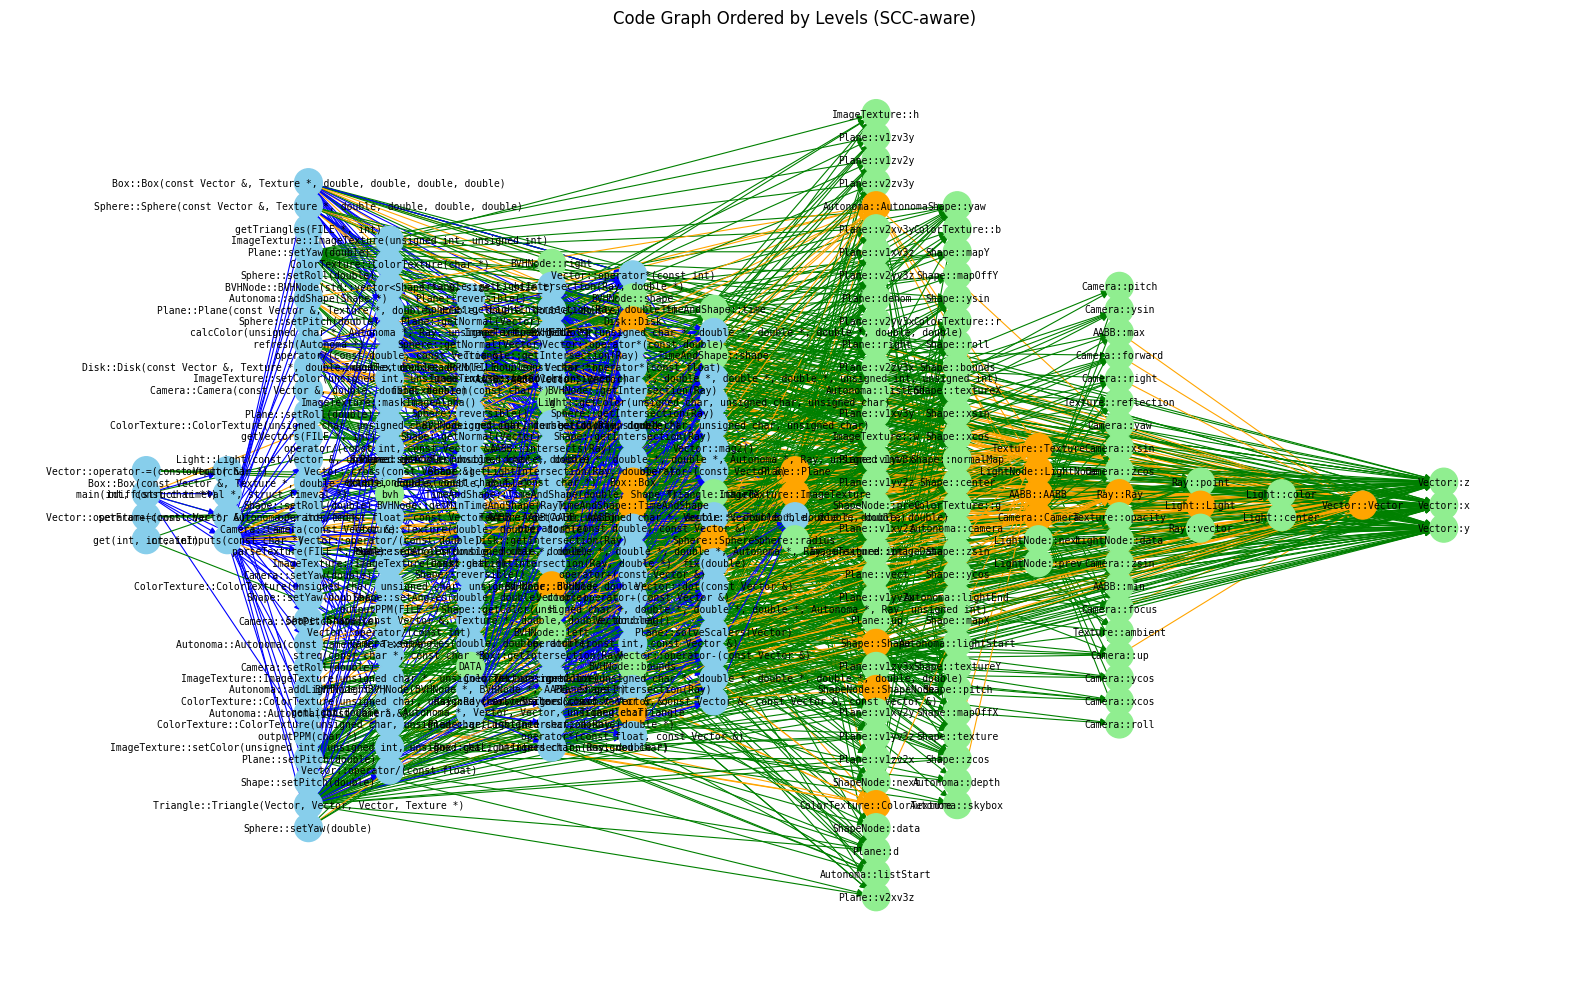

In [9]:
analyzer.plot(horizontal=True, node_filter=lambda node, attrs: (len(list(analyzer.predecessors(node))) != 0 or node == 'main(int, const char **)') 
              and is_kind(attrs["kind"], NodeKind.IN_CODEBASE))
# neural training law

In [7]:
from collections import defaultdict

# Create a dictionary to store symbols and their corresponding signatures
symbol_to_signatures = defaultdict(list)

# Iterate through the nodes in the graph
for node, attrs in analyzer.nodes(data=True):
    if is_kind(attrs["kind"], NodeKind.FUNCTION):
        # remove the (...) signature from the function name
        symbol = node.split("(")[0]
        symbol_to_signatures[symbol].append(node)

# Convert defaultdict to a regular dictionary
symbol_to_signatures = dict(symbol_to_signatures)

# Print the resulting dictionary
is_bijectional = all(len(signatures) == 1 for signatures in symbol_to_signatures.values())
print("Is the mapping a bijection? ", is_bijectional)

Is the mapping a bijection?  False


Function: Vector::dot, Signature: Vector::dot(const Vector &), Calls: 1629005763
Function: BVHNode::getMinTimeAndShape, Signature: BVHNode::getMinTimeAndShape(Ray), Calls: 1533427828
Function: Vector::Vector, Signature: Vector::Vector(double, double, double), Calls: 1323788368
Function: AABB::intersects, Signature: AABB::intersects(Ray), Calls: 1160679654
Function: Box::getLightIntersection, Signature: Box::getLightIntersection(Ray, double *), Calls: 857722366
Function: Plane::solveScalers, Signature: Plane::solveScalers(Vector), Calls: 468138192
Function: getLight, Signature: getLight(double *, Autonoma *, Vector, Vector, unsigned char), Calls: 419875177


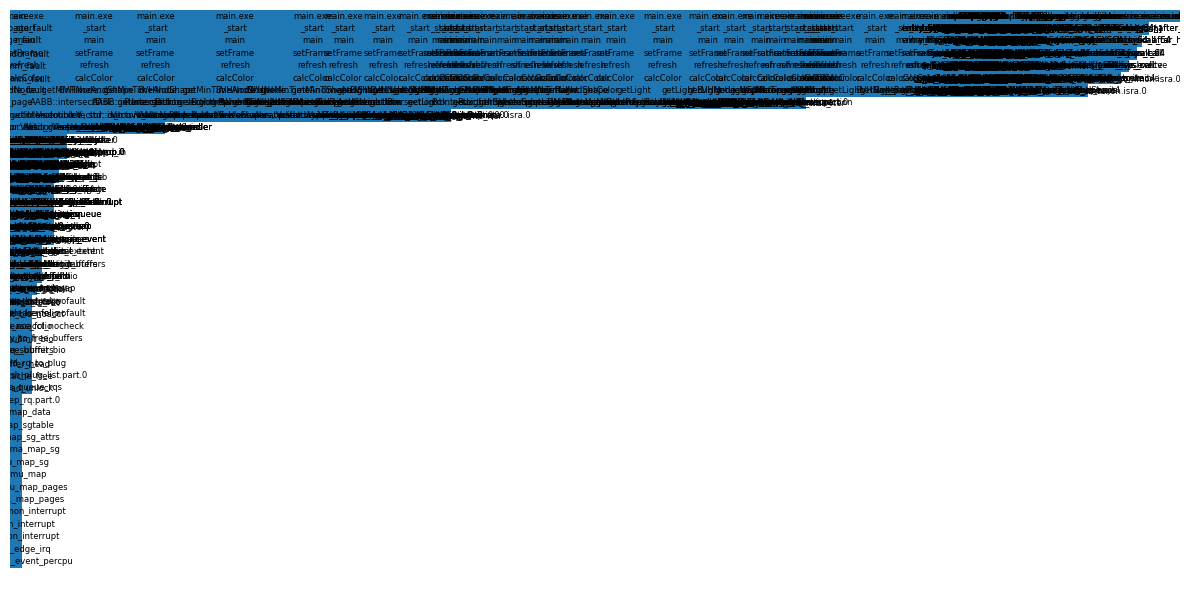

In [4]:
from analyzers.stack_analyzer import StackAnalyzer, FunctionStats

stack_analyzer = StackAnalyzer(f'{PROJECT_DIR}/perfstacks')
stats = stack_analyzer.get_top_functions(7)
for stat in stats:
    corresponding_signatures = symbol_to_signatures.get(stat.name, [])
    if len(corresponding_signatures) == 1:
        print(f"Function: {stat.name}, Signature: {corresponding_signatures[0]}, Calls: {stat.exclusive_time}")
    elif len(corresponding_signatures) > 1:
        print(f"Warning - multiple signatures found for function: {stat.name}")
        print(f"Function: {stat.name}, Signatures: {', '.join(corresponding_signatures)}, Calls: {stat.exclusive_time}")

stack_analyzer.plot()

In [7]:
from utils.cursor_utils import loc_info, CTOR_KINDS
from analyzers.code_analyzer import EdgeType
node = 'main(int, const char **)'
code = analyzer.nodes[node]['code']
print(f"Code for {node}:\n{code}")
# print the node's successors and the edge types
edges = list(analyzer.successors(node))
print(f"Successors of {node}:")
for edge in edges:
    edge_type = EdgeType(analyzer[node][edge]['type']).name
    print(f"  {edge} ({edge_type})")
# print the node's predecessors
predecessors = list(analyzer.predecessors(node))
print(f"Predecessors of {node}: {predecessors}")
# print the url of the file
file = analyzer.nodes[node]['file']
line = analyzer.nodes[node]['line']
print(f"File: {file}:{line}")
# print if the node is library or user defined
node_kind = analyzer.nodes[node]['kind']
# Access all the member variables of NodeKind
kinds = list(NodeKind)
for kind in kinds:
    if is_kind(node_kind, kind):
        print(f"{node} is of kind {NodeKind(kind).name}")
# print the node's AST
ast = analyzer.nodes[node]['ast']
print(f"AST for {node}:\n{ast}")
cursor = analyzer.nodes[node]['cursor']

Code for main(int, const char **):
int main(int argc, const char** argv){

   int frameLen = 1;
   const char* inFile = NULL;
   const char* animateFile = NULL;
   const char* outFile = NULL;
   bool toMovie = true;
   bool png = true;
   for (int i=1; i<argc; i++) {
      if (streq(argv[i], "-H")) {
         if (i + 1 >= argc) {
            printf("Error -H option must be followed by an integer height");
         }
         H = atoi(argv[i+1]);
         i++;
         continue;
      }
      if (streq(argv[i], "-W")) {
         if (i + 1 >= argc) {
            printf("Error -W option must be followed by an integer width");
         }
         W = atoi(argv[i+1]);
         i++;
         continue;
      }
      if (streq(argv[i], "-F")) {
         if (i + 1 >= argc) {
            printf("Error -F option must be followed by an integer number of frames");
         }
         frameLen = atoi(argv[i+1]);
         i++;
         continue;
      }
      if (streq(argv[i], "-o")) {
         if (

In [ ]:
import subprocess
import json
import networkx as nx
from concurrent.futures import ThreadPoolExecutor, as_completed

def run_cli_and_get_successors(codebase_dir, function_name):
    try:
        result = subprocess.run(
            ["python3", "analyzers/dependency_extractor.py", codebase_dir, function_name],
            stdout=subprocess.PIPE,
            stderr=subprocess.STDOUT,
            text=True
        )
        output = result.stdout.strip()

        successors = set()
        inside_func = False

        for line in output.splitlines():
            stripped = line.strip()
            if stripped.startswith("Function:"):
                inside_func = True
            elif stripped.startswith("Dependencies:"):
                continue
            elif "Function calls:" in stripped:
                continue
            elif stripped.startswith("- Name:"):
                name = stripped.split(":", 1)[-1].strip()
                if name:
                    successors.add(name)

        return function_name, successors

    except Exception as e:
        print(f"⚠️ Error running CLI for {function_name}: {e}")
        return function_name, set()

def compare_graph_to_cli(graph: nx.DiGraph, codebase_dir: str, max_workers: int = 8):
    print("\n🔍 Verifying successors (parallel)...")
    non_superset = []

    subgraph = analyzer.induce_subgraph(
        node_filter=lambda node, attrs: attrs["kind"] & NodeKind.FUNCTION and attrs["kind"] & NodeKind.IN_CODEBASE
    )

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_func = {
            executor.submit(run_cli_and_get_successors, codebase_dir, func): func
            for func in subgraph.nodes
        }

        for future in as_completed(future_to_func):
            func = future_to_func[future]
            cli_successors = set()
            try:
                func_name, cli_successors = future.result()
            except Exception as e:
                print(f"⚠️ Failed to get result for {func}: {e}")
                continue
            cli_successors = cli_successors
            graph_successors = graph.successors(func)
            # constraint the successors to only those which are functions or types
            graph_successors = {n for n in graph_successors if graph.nodes[n].get("kind") in {"function", "type"}}
            # if graph succesors is not a superset of cli successors
            if not cli_successors.issubset(graph_successors):
                non_superset.append((func, graph_successors, cli_successors))
                print(f"\n❌ Mismatch for: {func}")
                print(f"  ➤ Graph: {sorted(graph_successors)}")
                print(f"  ➤ CLI  : {sorted(cli_successors)}")
            else:
                print(f"\n✅ Match for: {func}")

    if not non_superset:
        print("\n✅ The graph is a superset of the CLI")
    else:
        print(f"\n❌ Found {len(non_superset)} non superset nodes.")

    return non_superset


print(str(PROJECT_DIR))

mismatches = compare_graph_to_cli(analyzer, str(PROJECT_DIR), max_workers=128)

/home/ayuram/pesquared/tmp/adiprerepa/cs598APE-hw1

🔍 Verifying successors (parallel)...

❌ Mismatch for: cosfn
  ➤ Graph: []
  ➤ CLI  : ['cos']

✅ Match for: identity

❌ Mismatch for: Plane::getColor
  ➤ Graph: []
  ➤ CLI  : ['Texture::getColor', 'Vector::Vector', 'Vector::operator-', 'fix', 'solveScalers']

❌ Mismatch for: Plane::setAngles
  ➤ Graph: []
  ➤ CLI  : ['Vector::Vector', 'Vector::dot', 'cos', 'sin']

❌ Mismatch for: outputPPM
  ➤ Graph: []
  ➤ CLI  : ['fclose', 'fopen', 'fprintf', 'fwrite', 'outputPPM']

❌ Mismatch for: get
  ➤ Graph: []
  ➤ CLI  : ['std::operator|=']

❌ Mismatch for: parseTexture
  ➤ Graph: []
  ➤ CLI  : ['ColorTexture::ColorTexture', 'ImageTexture::ImageTexture', 'ImageTexture::maskImageAlpha', 'ImageTexture::setColor', 'exit', 'getline', 'printf', 'sscanf', 'streq']

❌ Mismatch for: refresh
  ➤ Graph: []
  ➤ CLI  : ['Ray::Ray', 'Vector::Vector', 'Vector::operator+', 'calcColor', 'operator*']

✅ Match for: Shape::getNormal

❌ Mismatch for: fpeek
  ➤ Gra

## Obfuscation

In [11]:
import hashlib
import os
import re
from pathlib import Path
from typing import Dict, Set, List

from clang import cindex
from clang.cindex import CursorKind

from utils.string_utils import remove_comments, word_list


class Obfuscator:
    _word_pat_cache: Dict[frozenset, re.Pattern] = {}

    _CURSOR_KINDS_BY_TIER: Dict[int, Set[CursorKind]] = {
        2: {  # Variable names (user-defined)
            CursorKind.VAR_DECL,
            CursorKind.PARM_DECL,
            CursorKind.FIELD_DECL,
            CursorKind.ENUM_CONSTANT_DECL,
            CursorKind.MACRO_INSTANTIATION,
            CursorKind.MACRO_DEFINITION,
            CursorKind.MEMBER_REF_EXPR,
            CursorKind.DECL_REF_EXPR,
        },
        3: {  # Add user-defined functions & class names
            CursorKind.FUNCTION_DECL,
            CursorKind.CXX_METHOD,
            CursorKind.FUNCTION_TEMPLATE,
            CursorKind.STRUCT_DECL,
            CursorKind.CLASS_DECL,
            CursorKind.CLASS_TEMPLATE,
            CursorKind.TYPEDEF_DECL,
            CursorKind.TYPE_ALIAS_DECL,
            CursorKind.TYPE_ALIAS_TEMPLATE_DECL,
            CursorKind.ENUM_DECL,
            CursorKind.TEMPLATE_TYPE_PARAMETER,
            CursorKind.TEMPLATE_NON_TYPE_PARAMETER,
            CursorKind.TEMPLATE_TEMPLATE_PARAMETER,
            CursorKind.NAMESPACE,
            CursorKind.TEMPLATE_REF,
            CursorKind.TYPE_REF,
        },
        4: set()  # Same as tier 3, but allows library symbols
    }

    def __init__(self, tier: int, nodes: List[dict], project_root: Path, prefix: str = "o_"):
        if not (0 <= tier <= 4):
            raise ValueError("tier must be between 0 and 4")
        self.tier = tier
        self.prefix = prefix
        self.project_root = project_root.resolve()

        self._kinds = self._resolve_kinds()
        self._tokens = self._collect_tokens(nodes)
        self._obf_map = self._create_obf_map(self._tokens)
        self._pattern = self._compiled_word_pattern(self._tokens)

    def obfuscate(self, code: str) -> str:
        if not self._obf_map:
            return code
        if self.strip_comments:
            code = remove_comments(code)

        def repl(match: re.Match[str]) -> str:
            return self._obf_map[match.group(0)]

        return self._pattern.sub(repl, code)

    def deobfuscate(self, code: str) -> str:
        if not self._obf_map:
            return code
        reverse_map = {v: k for k, v in self._obf_map.items()}
        pattern = self._compiled_word_pattern(set(reverse_map))

        def repl(match: re.Match[str]) -> str:
            return reverse_map[match.group(0)]

        return pattern.sub(repl, code)

    @property
    def obfuscation_map(self) -> Dict[str, str]:
        return self._obf_map

    @property
    def strip_comments(self) -> bool:
        return self.tier >= 1

    def _resolve_kinds(self) -> Set[cindex.CursorKind]:
        if self.tier < 2:
            return set()
        kinds = set()
        for t in range(2, self.tier + 1):
            kinds.update(self._CURSOR_KINDS_BY_TIER.get(t, set()))
        return kinds

    def _collect_tokens(self, nodes: List[dict]) -> Set[str]:
        tokens = set()

        def _should_obfuscate(cur: cindex.Cursor) -> bool:
            if cur is None or cur.kind == CursorKind.TRANSLATION_UNIT:
                return False
            if cur.kind not in self._kinds:
                return False
            if self.tier >= 4:
                return True
            return self._is_user_defined(cur)

        def _recurse(cur: cindex.Cursor):
            if _should_obfuscate(cur) and cur.spelling:
                tokens.add(cur.spelling)
            for child in cur.get_children():
                _recurse(child)

        for node in nodes:
            cursor = node.get("cursor")
            if cursor:
                _recurse(cursor)

        return tokens

    def _create_obf_map(self, tokens: Set[str]) -> Dict[str, str]:
        mapping = {}
        used_words = set()
        for token in tokens:
            word = random.choice(word_list)[:5]
            while word in used_words or word in tokens:
                word = random.choice(word_list)[:5]
            mapping[token] = f"{self.prefix}{word}"
        return mapping

    def _compiled_word_pattern(self, words: Set[str]) -> re.Pattern:
        key = frozenset(words)
        if key in self._word_pat_cache:
            return self._word_pat_cache[key]
        altern = "|".join(map(re.escape, sorted(words, key=len, reverse=True)))
        pat = re.compile(rf"(?<!\w)(?:{altern})(?!\w)")
        self._word_pat_cache[key] = pat
        return pat

    def _is_user_defined(self, cursor: cindex.Cursor) -> bool:
        definition = cursor.get_definition()
        loc_file = (
            definition.location.file.name
            if definition and definition.location.file
            else cursor.location.file.name
            if cursor.location.file
            else None
        )
        if loc_file is None:
            return self.tier >= 4

        file_path = Path(loc_file).resolve()
        try:
            in_project = file_path.is_relative_to(self.project_root)
        except AttributeError:
            in_project = str(file_path).startswith(str(self.project_root))

        is_writeable = os.access(file_path, os.W_OK)
        return in_project or is_writeable or self.tier >= 4


import random
import textwrap

function_nodes = [node for node, attrs in analyzer.nodes(data=True) if is_kind(attrs["kind"], NodeKind.FUNCTION) and is_kind(attrs["kind"], NodeKind.IN_CODEBASE)]
random_node = random.choice(list(function_nodes))
successors = list(analyzer.successors(random_node))
nodes = [analyzer.nodes[n] for n in successors]
nodes.append(analyzer.nodes[random_node])

obfuscator = Obfuscator(tier=3, nodes=nodes, project_root=PROJECT_DIR)

code = "\n".join(n["code"] for n in nodes)

obfuscated_code = obfuscator.obfuscate(code)
deobfuscated_code = obfuscator.deobfuscate(obfuscated_code)

print("\nOriginal code:")
print(textwrap.indent(code, "  "))

print("\nObfuscated code:")
print(textwrap.indent(obfuscated_code, "  "))

print("\nObfuscation map:")
for orig, obf in obfuscator.obfuscation_map.items():
    print(f"  {orig} -> {obf}")

if remove_comments(deobfuscated_code) == remove_comments(code):
    print("\n✅ Deobfuscation successful!")
else:
    print("\n❌ Deobfuscation failed.")
    # print the deobfuscated code
    print(textwrap.indent(deobfuscated_code, "  "))
    


Original code:
  class Plane : public Shape{
  public:
    Vector vect, right, up;
    double denom;

    double v1xv2y, v1xv2z, v1xv3y, v1xv3z;
    double v1yv2x, v1yv2z, v1yv3x, v1yv3z;
    double v1zv2x, v1zv2y, v1zv3x, v1zv3y;

    double v2xv3y, v2xv3z;
    double v2yv3x, v2yv3z;
    double v2zv3x, v2zv3y;


    double d;
    Plane(const Vector &c, Texture* t, double ya, double pi, double ro, double tx, double ty);
    double getIntersection(Ray ray);
    bool getLightIntersection(Ray ray, double* toFill);
    void move();
    void getColor(unsigned char* toFill, double* am, double* op, double* ref, Autonoma* r, Ray ray, unsigned int depth);
    Vector getNormal(Vector point);
    unsigned char reversible();
    void setAngles(double yaw, double pitch, double roll);
    void setYaw(double d);
    void setPitch(double d);
    void setRoll(double d);
    Vector solveScalers(Vector C);
  };
  double yaw, pitch, roll,
  double yaw, pitch, roll, xsin, xcos, ysin, ycos, zsin, zcos;
  _

## Optimization

In [ ]:
from typing import Optional, List, Dict
import os
import openai
import anthropic
import google.generativeai as genai
from collections import deque
from utils.string_utils import extract_markdown_blocks, markdown_to_dict
import networkx as nx

class OptimizerAgent:
    def __init__(self, model: str, provider: str = "openai", api_key: Optional[str] = None):
        self.model = model
        self.provider = provider.lower()
        self.api_key = api_key

        # Initialize the appropriate client
        if self.provider == "openai":
            self.client = openai.OpenAI(api_key=api_key)

        elif self.provider == "anthropic":
            self.client = anthropic.Anthropic(api_key=api_key)

        elif self.provider == "gemini":
            # Set API key securely and directly
            if not api_key:
                raise ValueError("Missing API key for Gemini provider.")
            
            genai.configure(api_key=api_key)
            self.client = genai  # Keep the module reference for later GenerativeModel use


        else:
            raise ValueError(f"Unsupported provider: {provider!r}. "
                             "Use one of ['openai', 'anthropic', 'gemini'].")

    def prompt(self,
               input_prompt: str,
               context_window: Optional[List[str]] = None,
               system_message: Optional[str] = "You are an expert C++ performance optimization engineer.",
               temperature: float = 0.7,
               max_tokens: int = 4096) -> str:

        # Build messages in the right shape for each provider
        if self.provider in ("openai", "anthropic"):
            # OpenAI- & Anthropic-style role-based messages
            messages = []
            if system_message:
                messages.append({"role": "system", "content": system_message})
            if context_window:
                messages.extend({"role": "user", "content": m} for m in context_window)
            messages.append({"role": "user", "content": input_prompt})

            if self.provider == "openai":
                resp = self.client.chat.completions.create(
                    model=self.model,
                    messages=messages,
                    temperature=temperature,
                    max_tokens=max_tokens,
                )
                return resp.choices[0].message.content

            else:  # anthropic
                resp = self.client.messages.create(
                    model=self.model,
                    messages=messages,
                    temperature=temperature,
                    max_tokens=max_tokens,
                )
                return resp.content[0].text

        elif self.provider == "gemini":
            # Use the configured genai client to create a model instance
            model = self.client.GenerativeModel(self.model)

            # Flatten messages into a prompt string
            full_prompt = ""
            if system_message:
                full_prompt += f"{system_message}\n\n"
            if context_window:
                full_prompt += "\n".join(context_window) + "\n\n"
            full_prompt += input_prompt

            # Generate response
            resp = model.generate_content(
                full_prompt,
                generation_config=self.client.types.GenerationConfig(
                    temperature=temperature,
                    max_output_tokens=max_tokens,
                )
            )
            return resp.text
        else:
            # Should never happen because __init__ guards this
            raise RuntimeError(f"Invalid provider: {self.provider!r}")

    def optimize_node(
        self,
        node: str,
        obfuscation_tier: int = 0,
        system_message: Optional[str] = None,
        callee_depth: int = 0,
        node_filter: Optional[callable] = None,   # expects lambda (node_id, attrs) -> bool
        edge_filter: Optional[callable] = None,   # expects lambda ((u,v), attrs) -> bool
        caller_depth: int = 0,
    ) -> str:
        """
        Optimize a code node from a graph.  Gathers up to `context_depth` hops
        of neighbors (filtered by node_filter/edge_filter), obfuscates them,
        sends to the LLM, then deobfuscates the diff.
        """
        # 1) Grab the code for the target node
        labels = analyzer.nodes[node]
        code = labels.get("code", "").strip()
        if not code:
            raise ValueError(f"Node {node!r} has no code")

        # 2) BFS out to collect context nodes up to context_depth
        lengths = nx.single_source_shortest_path_length(analyzer, node, cutoff=callee_depth)
        # drop the root, then apply node_filter
        callee_nodes = [
            n for n in lengths
            if n != node
            and (node_filter is None or node_filter(n, analyzer.nodes[n]))
        ]

        # 3) (Optional) apply edge_filter: ensure at least one valid path exists
        if edge_filter is not None:
            def has_valid_path(target):
                for path in nx.all_simple_paths(analyzer, source=node, target=target, cutoff=callee_depth):
                    # check every edge in this path
                    if all(
                        edge_filter((u, v), analyzer.edges[u, v])
                        for u, v in zip(path, path[1:])
                    ):
                        return True
                return False
            callee_nodes = [n for n in callee_nodes if has_valid_path(n)]
        
        # 3.5) add caller nodes using BFS on the predecessors (ensuring nodes and edge filters are applied)
        # We can't use the same function as above, because we need to check the predecessors
        caller_nodes = []
        bfs = deque([(node, caller_depth)])
        visited = set()
        while bfs:
            current_node, depth = bfs.popleft()
            if depth == 0:
                continue
            for pred in analyzer.predecessors(current_node):
                if pred not in visited and (node_filter is None or node_filter(pred, analyzer.nodes[pred])):
                    visited.add(pred)
                    caller_nodes.append(pred)
                    bfs.append((pred, depth - 1))
        

        # 4) Prepare obfuscator over the target + contexts
        ob_nodes = [analyzer.nodes[n] for n in [node] + callee_nodes + caller_nodes]
        obfuscator = Obfuscator(
            tier=obfuscation_tier,
            nodes=ob_nodes,
            project_root=PROJECT_DIR
        )

        # 5) Obfuscate each code snippet and build context_window
        context_window = []

        # Callees
        for n in callee_nodes:
            attrs = analyzer.nodes[n]
            snippet = attrs.get("code", "").strip()
            if snippet:
                ob_snippet = obfuscator.obfuscate(snippet)
                context_window.append(
                    f"📄 Callee — File: {attrs.get('file', '<unknown>')}\n```cpp\n{ob_snippet}\n```"
                )

        # Callers
        for n in caller_nodes:
            attrs = analyzer.nodes[n]
            snippet = attrs.get("code", "").strip()
            if snippet:
                ob_snippet = obfuscator.obfuscate(snippet)
                context_window.append(
                    f"📄 Caller — File: {attrs.get('file', '<unknown>')}\n```cpp\n{ob_snippet}\n```"
                )

        ob_code = obfuscator.obfuscate(code)
        obfuscated_node = obfuscator.obfuscate(node)

        # Determine if function is "long"
        is_long_function = False


        # 6) Build the structured prompt (unified-diff focus)
        prompt = (
            f"You are an expert C++ performance engineer. Optimize the following C++ function `{obfuscated_node}` for performance.\n\n"
            f"{'You may modify the signature if needed, but you MUST update all its callers accordingly.' if caller_depth else 'It is CRITICAL that you DO NOT modify the function signature.'}\n\n"
            "You have access to:\n"
            "- Callee context\n"
            "- Caller context\n"
            "Please note:\n"
            f"- Callees and Callers are NOT exclusive to `{obfuscated_node}` and might be used by other functions\n"
            f"{'- The code is fully correct and compilable as is\n' if obfuscation_tier > 0 else '- The code has been obfuscated but is still correct and compilable as is\n'}"
            f"{'⚙️ Return strictly as unified diffs.' if is_long_function else '✍️ Return the optimized function as a drop-in replacement. Do not return a diff; return the full rewritten function.'}\n\n"
            "```cpp\n"
            f"{ob_code}\n"
            "```\n\n"
            "Structure your response as follows:\n\n"
            "# Performance Insights\n"
            "<Describe what you changed and why>\n\n"
            "# Changes\n\n"
            +
            (
                # If long: unified diffs section
                'For each modified function, include:\n\n'
                '## `<function_name>`\n'
                '```diff\n'
                '<unified diff>\n'
                '```'
                if is_long_function else
                # Else: drop-in replacement section
                'For each modified function, include:\n\n'
                '## `<function_name>`\n'
                '```cpp\n'
                '<fully rewritten function>\n'
                '```'
            )
        )

        # 7) Send to the LLM
        raw_resp = self.prompt(
            input_prompt=prompt,
            context_window=context_window,
            system_message=system_message
        )

        # 8) De-obfuscate and return
        return obfuscator.deobfuscate(raw_resp)

from dotenv import load_dotenv
load_dotenv()  # Automatically loads variables from .env into os.environ

# Example usage with Google Gemini:
optimizer = OptimizerAgent(
    model="gemini-1.5-flash",
    provider="gemini",
    api_key=os.getenv("GEMINI_API_KEY")
)
response = optimizer.optimize_node(
    node=random_node,
    callee_depth=1,
    caller_depth=1,
    obfuscation_tier=3,
    node_filter=lambda node, attrs: is_kind(attrs["kind"], NodeKind.IN_CODEBASE),
)
print(response)


# Performance Insights

The original `Plane::setRoll` function suffers from redundant calculations. Many intermediate values are repeatedly calculated.  The optimization focuses on calculating each unique intermediate value only once and reusing it where possible.  This significantly reduces the number of floating-point operations, leading to a performance improvement.  The calculation of `denom` is particularly improved by factoring out common subexpressions.  Furthermore, the order of operations is optimized to reduce the number of temporary variables needed.

# Changes

## `Plane::setRoll`

```cpp
void Plane::setRoll(double c) {
    roll = c;
    zcos = cos(roll);
    zsin = sin(roll);

    double nonco_petit_mamo = xsin * ycos * zcos;
    double assub_bedew = ysin * zsin;
    double assub_mamo = ysin * zcos;
    double nonco_petit_bedew = xsin * ycos * zsin;
    double desti_mamo = xcos * zcos;
    double desti_bedew = xcos * zsin;

    vect.x = nonco_petit_mamo + assub_bedew;
    

In [12]:
resp_dict = markdown_to_dict(response)
resp_dict.cutoff = 0.3
resp_dict

{'performance insights': "The original `Autonoma::addShape` function uses `malloc` for memory allocation, which is slower and less efficient than using `new` within a class method.  Furthermore, it manually manages a doubly linked list, which introduces overhead for insertions at the end.  For improved performance, we'll switch to a `std::vector` for shape storage. This offers amortized constant time for appending elements, avoiding the pointer manipulation and memory allocation overhead of the manual linked list.  Using `std::vector` also leverages memory management provided by the standard library, which is typically more optimized than manual allocation.",
 'changes': '',
 '`autonoma::addshape`': '```cpp\nvoid Autonoma::addShape(Shape* shape) {\n  shapes_.push_back(shape);\n}\n```',
 '`createinputs`': 'This function needs to be updated to accommodate the change in `addShape`.  The original used a manual linked list, so we remove that logic.  We also allocate the `Autonoma` object us

## $\text{Optimization}^2$

In [15]:
def parse_diff(diff_text):
    """Parse a unified diff string into a list of hunks."""
    hunks = []
    current_hunk = []
    for line in diff_text.splitlines():
        if line.startswith('@@'):
            if current_hunk:
                hunks.append(current_hunk)
            current_hunk = [line]
        else:
            current_hunk.append(line)
    if current_hunk:
        hunks.append(current_hunk)
    return hunks

def parse_hunk_simple(hunk_lines):
    """Parse a hunk into leading context, trailing context, remove count, and add lines."""
    leading_context = []
    trailing_context = []
    remove_count = 0
    add_lines = []
    in_change = False
    for line in hunk_lines:
        if line.startswith(' '):
            if not in_change:
                leading_context.append(line[1:])
            else:
                trailing_context.append(line[1:])
        elif line.startswith('-'):
            in_change = True
            remove_count += 1
        elif line.startswith('+'):
            in_change = True
            add_lines.append(line[1:])
    return leading_context, trailing_context, remove_count, add_lines

def apply_hunk_fuzzy_simple(hunk_lines, corpus):
    """Apply a single hunk to the corpus fuzzily using context matching."""
    leading_context, trailing_context, remove_count, add_lines = parse_hunk_simple(hunk_lines)
    C_lead = len(leading_context)
    C_trail = len(trailing_context)
    
    # Skip if no context is provided to anchor the changes
    if C_lead == 0 and C_trail == 0:
        return
    
    # Search for the best position to apply the hunk
    best_score = -1
    best_i = -1
    max_pos = len(corpus) - C_lead - remove_count - C_trail + 1
    for i in range(max_pos if max_pos > 0 else 0):
        # Calculate similarity score for leading context
        score_lead = sum(1 for a, b in zip(corpus[i:i + C_lead], leading_context) if a == b)
        # Calculate similarity score for trailing context
        score_trail = sum(1 for a, b in zip(
            corpus[i + C_lead + remove_count:i + C_lead + remove_count + C_trail],
            trailing_context
        ) if a == b)
        score = score_lead + score_trail
        if score > best_score:
            best_score = score
            best_i = i
    
    # Apply the changes if a suitable position is found
    if best_i != -1:
        start_remove = best_i + C_lead
        end_remove = start_remove + remove_count
        del corpus[start_remove:end_remove]
        corpus[start_remove:start_remove] = add_lines

def apply_diff_fuzzy(corpus, diff_text):
    """
    Apply a diff with potentially inaccurate hunks to a corpus fuzzily.
    
    Args:
        corpus (list of str): The original text as a list of lines.
        diff_text (str): The diff in unified diff format.
    
    Returns:
        list of str: The modified corpus after applying the diff.
    """
    hunks = parse_diff(diff_text)
    for hunk in hunks:
        apply_hunk_fuzzy_simple(hunk, corpus)
    return corpus

# Example usage:

    # Sample corpus
file = analyzer.nodes[random_node]['file']
with open(file, 'r') as f:
    corpus = f.readlines()
corpus = analyzer.nodes[random_node]['code'].splitlines()
# Sample diff with one hunk
diff_text = extract_markdown_blocks(resp_dict['function'])[0]
# Apply the diff
modified_corpus = apply_diff_fuzzy(corpus, diff_text)
print("\n".join(modified_corpus))

Vector Plane::solveScalers(Vector C) {
    double v1xv2y = v1x * v2y;
    double v1xv2z = v1x * v2z;
    double v1yv2x = v1y * v2x;
    double v1yv2z = v1y * v2z;
    double v1zv2x = v1z * v2x;
    double v1zv2y = v1z * v2y;
    double v2xv3y = v2x * v3y;
    double v2xv3z = v2x * v3z;
    double v2yv3x = v2y * v3x;
    double v2yv3z = v2y * v3z;
    double v2zv3x = v2z * v3x;
    double v2zv3y = v2z * v3y;
    double a = C.z * v2yv3x - C.y * v2zv3x - C.z * v2xv3y + C.x * v2zv3y + C.y * v2xv3z - C.x * v2yv3z;
    double b = -C.z * v1yv3x + C.y * v1zv3x + C.z * v1xv3y - C.x * v1zv3y - C.y * v1xv3z + C.x * v1yv3z;
    double c = C.z * v1yv2x - C.y * v1zv2x - C.z * v1xv2y + C.x * v1zv2y + C.y * v1xv2z - C.x * v1yv2z;
    double invDenom = 1.0 / denom;

    return Vector(a * invDenom, b * invDenom, c * invDenom);
             + C.y * v1xv2z - C.x * v1yv2z;

   return Vector(a / denom, b / denom, c / denom);
}
